In [3]:
# library for feature engineering and EDA
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
#import pandas_profiling
from datetime import datetime
import random

# library for statistic
from scipy import stats
from scipy.stats import chi2_contingency, kruskal
from scipy.stats import boxcox, norm
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.formula.api import ols

# library for sampling
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE

# library for machine learning
import sklearn
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

import shap
%matplotlib inline

## 1. Data Processing 1

### 1-1 Data Load

In [5]:
!pwd
path_lecture = "./"
random_state = 1234

/Users/dylank/dylan/credit_approval_prediction


In [97]:
df = pd.read_csv(path_lecture + "data/application_record.csv")
df_record = pd.read_csv(path_lecture + "data/credit_record.csv")
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [98]:
df_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [99]:
df_record.sort_values(["ID", "MONTHS_BALANCE"], ascending=False).groupby("ID").first()

,MONTHS_BALANCE,STATUS
ID,,
5001711,0,X
5001712,0,C
5001713,0,X
5001714,0,X
5001715,0,X
...,...,...
5150482,-11,C
5150483,0,X
5150484,0,C


### 1-2 Check Duplicated Data 

In [100]:
print("Number of duplicate data :", len(df[df.duplicated()]))
print("Number of duplicate data :", len(df_record[df_record.duplicated()]))

Number of duplicate data : 0
Number of duplicate data : 0


### 1-3 Data Join

In [101]:
len(df)

438557

In [102]:
df.merge(df_record, on='ID', how="inner").head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C


In [103]:
len(df.merge(df_record, on="ID", how="inner"))

777715

In [104]:
print(len(df_record))
print(df_record.ID.nunique())

1048575
45985


In [105]:
df_record.MONTHS_BALANCE.unique()

array([  0,  -1,  -2,  -3,  -4,  -5,  -6,  -7,  -8,  -9, -10, -11, -12,
       -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25,
       -26, -27, -28, -29, -30, -31, -32, -33, -34, -35, -36, -37, -38,
       -39, -40, -41, -42, -43, -44, -45, -46, -47, -48, -49, -50, -51,
       -52, -53, -54, -55, -56, -57, -58, -59, -60])

In [106]:
df_record_filtered = df_record.sort_values(["ID", "MONTHS_BALANCE"], ascending=False).groupby("ID").first()
df_record_filtered


,MONTHS_BALANCE,STATUS
ID,,
5001711,0,X
5001712,0,C
5001713,0,X
5001714,0,X
5001715,0,X
...,...,...
5150482,-11,C
5150483,0,X
5150484,0,C


In [107]:
df = df.merge(df_record_filtered, on="ID", how="inner")

In [108]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,C
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-22,X


In [109]:
len(df)

36457

### 1-4 Dependent Data Selection

In [110]:
df.STATUS.unique()

array(['C', '0', 'X', '1', '5', '3', '4', '2'], dtype=object)

In [111]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,C
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-22,X


In [112]:
condition_no_approval = df.STATUS.isin(["0","1","2","3","4","5"])

In [113]:
df["Target_Status"] = None

df.loc[condition_no_approval,"Target_Status"] = 0 
df.loc[~condition_no_approval, "Target_Status"] = 1 

In [114]:
df.head(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,Target_Status
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,0,C,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,0,C,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,1,0,0,0,Security staff,2.0,0,C,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,0,0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-22,X,1


In [115]:
# remove Status 
df = df.drop("STATUS", axis=1)

In [116]:
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE',
       'Target_Status'],
      dtype='object')

## 2. Data EDA

### 2-1 Data Type and Summary

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [118]:
df.isna().sum().sort_values(ascending=False)

OCCUPATION_TYPE        11323
ID                         0
CODE_GENDER                0
MONTHS_BALANCE             0
CNT_FAM_MEMBERS            0
FLAG_EMAIL                 0
FLAG_PHONE                 0
FLAG_WORK_PHONE            0
FLAG_MOBIL                 0
DAYS_EMPLOYED              0
DAYS_BIRTH                 0
NAME_HOUSING_TYPE          0
NAME_FAMILY_STATUS         0
NAME_EDUCATION_TYPE        0
NAME_INCOME_TYPE           0
AMT_INCOME_TOTAL           0
CNT_CHILDREN               0
FLAG_OWN_REALTY            0
FLAG_OWN_CAR               0
Target_Status              0
dtype: int64

In [119]:
# categorical and numeric columns
for column_name in list(df.columns):
    print(column_name, df[column_name].dtype, df[column_name].unique())

ID int64 [5008804 5008805 5008806 ... 5149838 5150049 5150337]
CODE_GENDER object ['M' 'F']
FLAG_OWN_CAR object ['Y' 'N']
FLAG_OWN_REALTY object ['Y' 'N']
CNT_CHILDREN int64 [ 0  1  3  2  4  5 14 19  7]
AMT_INCOME_TOTAL float64 [ 427500.   112500.   270000.   283500.   135000.   130500.   157500.
  405000.   211500.   360000.   126000.   315000.   247500.   297000.
  225000.   166500.   216000.   255150.   148500.   202500.    94500.
  450000.   180000.    90000.   765000.   382500.   144000.   229500.
  292500.    74250.    40500.   337500.   193500.   267750.   139500.
   67500.   252000.   900000.   115290.   279000.    76500.   234000.
   81000.   108000.    99000.   198000.    45000.   238500.   117000.
  153000.  1350000.   445500.   495000.    85500.   306000.   562500.
  189000.   328500.   310500.   540000.   171000.   675000.   121500.
   72000.    65250.   184500.   103500.   162000.   165150.    54000.
  243000.   256500.    33300.   697500.   101250.    58500.   110250.
  

In [120]:
# casting categorical columns as object type 
list_cast_object = ["ID", "FLAG_MOBIL", "FLAG_WORK_PHONE", "FLAG_PHONE", "FLAG_EMAIL"]
for column_name in list_cast_object:
  df[column_name] = df[column_name].astype(object)


In [121]:
list_categorical_columns = list(df.select_dtypes(include=['object']).columns)
list_numeric_columns = list(df.select_dtypes(include=['float64','int64']).columns)
target_column = "Target_Status"
print(len(df))
print(len(df.columns))
print(len(list_categorical_columns))
print(len(list_numeric_columns))

36457
20
14
6


#### Summary of Data Set
##### - Number of Variables : 20
    numeric variables : 6
    categorical variables : 14 (include = target)
##### - Number of observations : 36457
##### - Missing Cells : 1 columns (OCCUPATION_TYPE)
##### - Duplicated Rows : 0

### 2-2 Dependent Data Explore

In [122]:
list_categorical_columns.remove(target_column)


In [123]:
df[target_column].describe()

count     36457
unique        2
top           1
freq      27619
Name: Target_Status, dtype: int64

<Axes: xlabel='Target_Status', ylabel='count'>

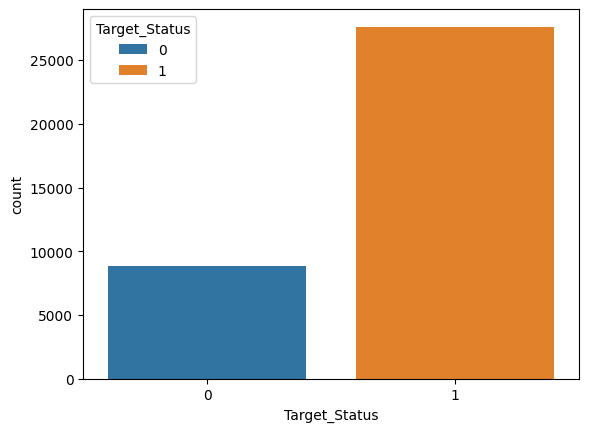

In [124]:
sns.countplot(x=target_column, data=df, hue=target_column)


### 2-3 Independent Data Explore

#### 1) Categorical Data Analysis

In [125]:
df[list_categorical_columns].nunique().sort_values()


FLAG_MOBIL                 1
CODE_GENDER                2
FLAG_OWN_CAR               2
FLAG_OWN_REALTY            2
FLAG_WORK_PHONE            2
FLAG_PHONE                 2
FLAG_EMAIL                 2
NAME_INCOME_TYPE           5
NAME_EDUCATION_TYPE        5
NAME_FAMILY_STATUS         5
NAME_HOUSING_TYPE          6
OCCUPATION_TYPE           18
ID                     36457
dtype: int64

In [126]:

df = df.drop(["ID", "FLAG_MOBIL"], axis=1)

In [127]:
list_categorical_columns.remove("ID")
list_categorical_columns.remove("FLAG_MOBIL")

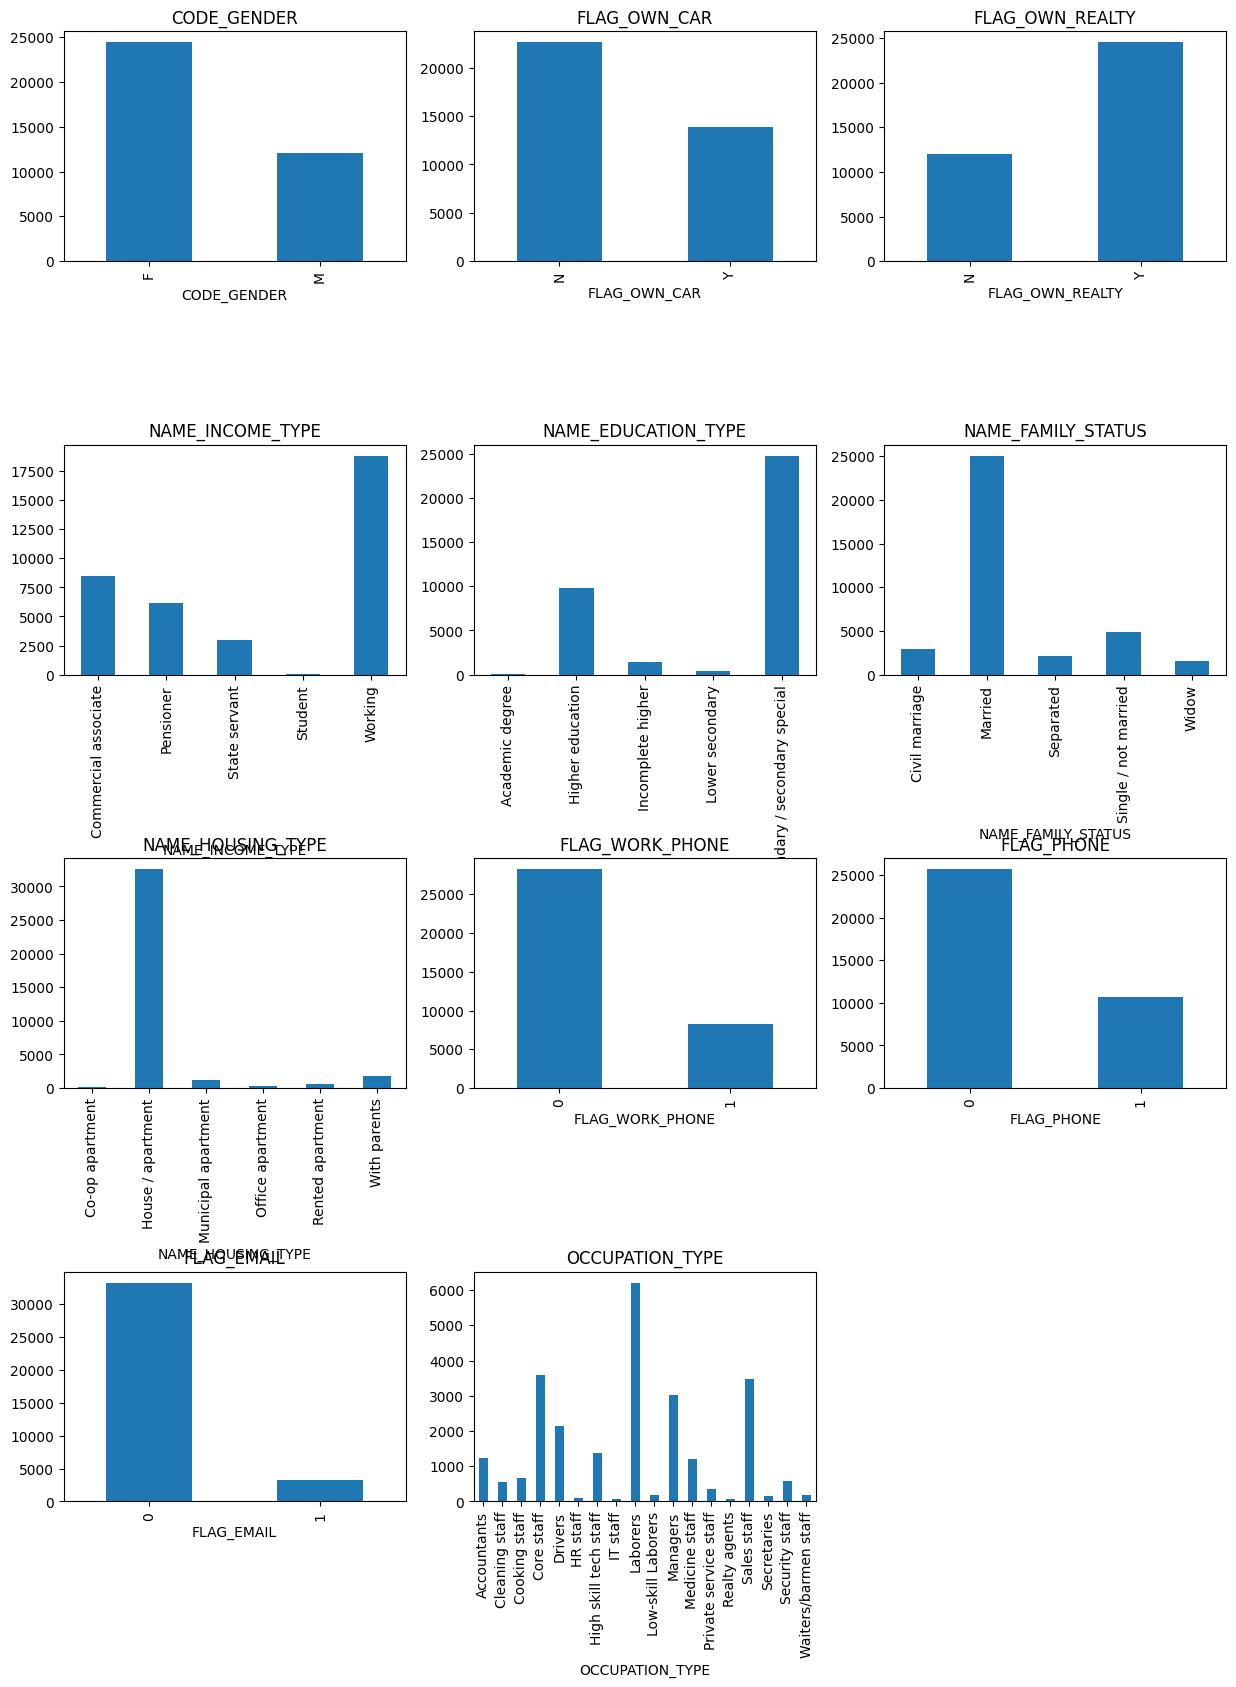

In [128]:
plt.figure(figsize=(15,15))
x = 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.8, wspace=0.2)
for column_name in list_categorical_columns:
    plt.subplot(4,3,x)
    x = x+1
    df[column_name].value_counts().sort_index().plot(kind='bar')
    plt.title(column_name)
plt.show()

##### Check distribution of relationship between target column and categorical column

<Axes: xlabel='CODE_GENDER'>

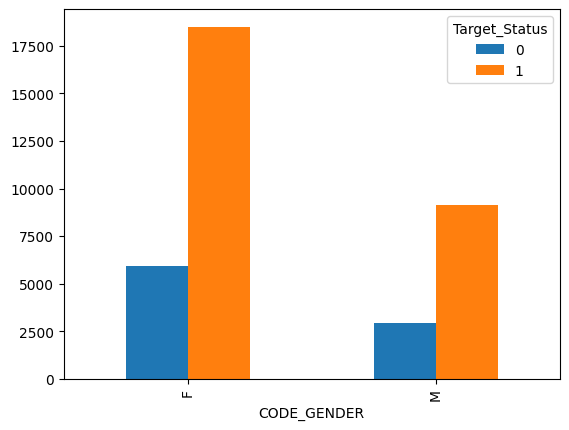

In [129]:
df_poutcome_dependent = pd.crosstab(df[list_categorical_columns[0]],df[target_column])
df_poutcome_dependent.plot(kind='bar')

In [130]:

pd.crosstab(df[list_categorical_columns[0]],df[target_column], normalize="index")

Target_Status,0,1
CODE_GENDER,,
F,0.242448,0.757552
M,0.242371,0.757629


<Axes: xlabel='CODE_GENDER'>

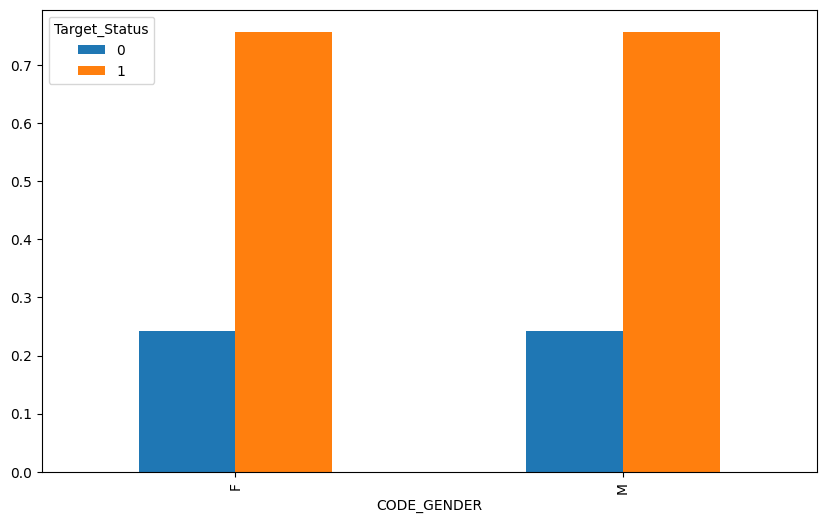

In [131]:

df_poutcome_dependent_ratio = pd.crosstab(df[list_categorical_columns[0]],df[target_column], normalize="index")
df_poutcome_dependent_ratio.plot.bar(figsize=(10,6))

<Figure size 3000x3000 with 0 Axes>

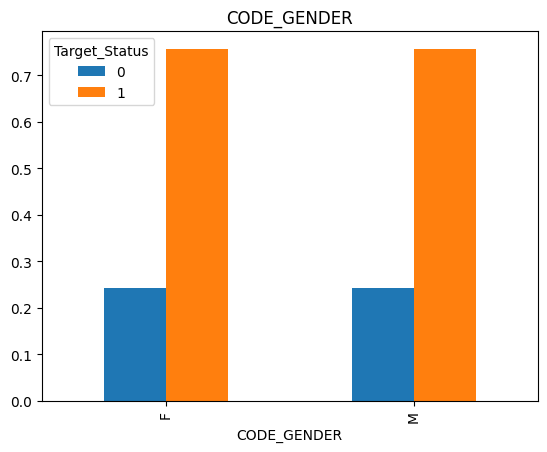

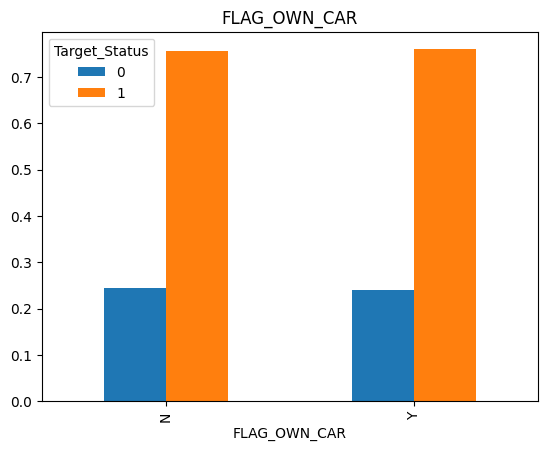

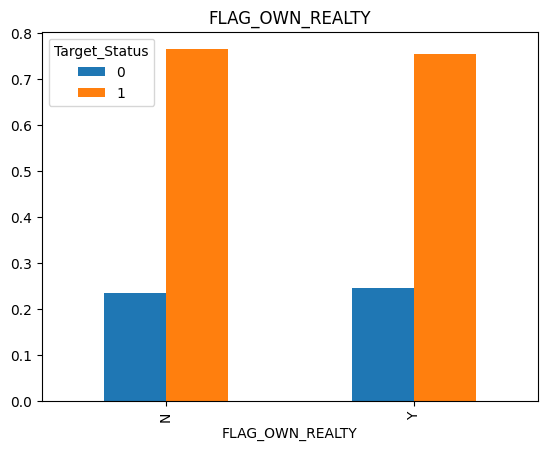

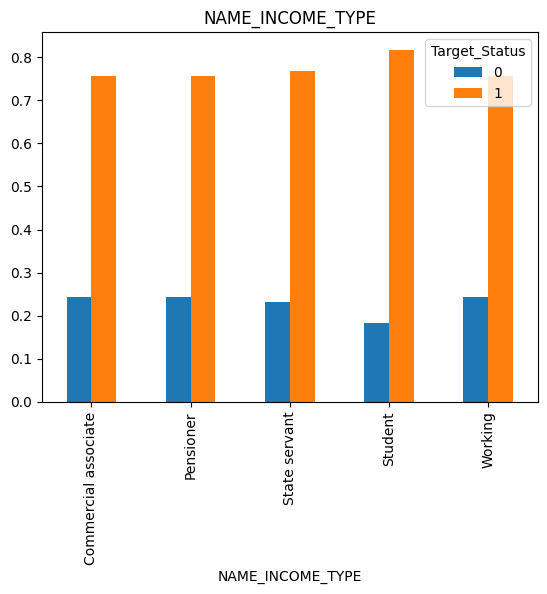

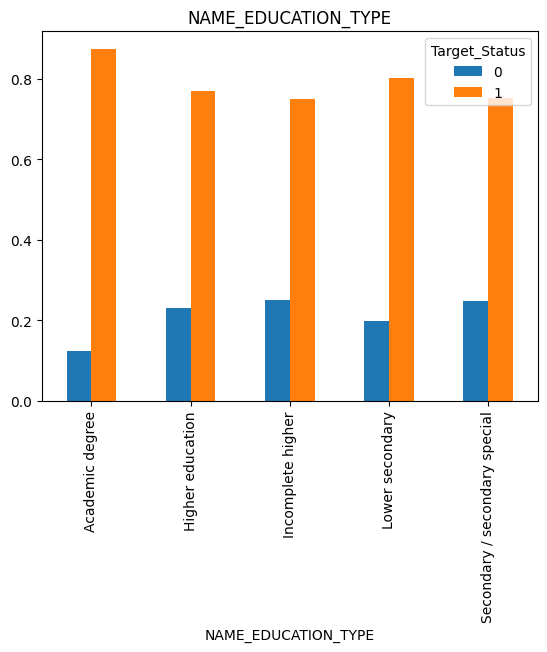

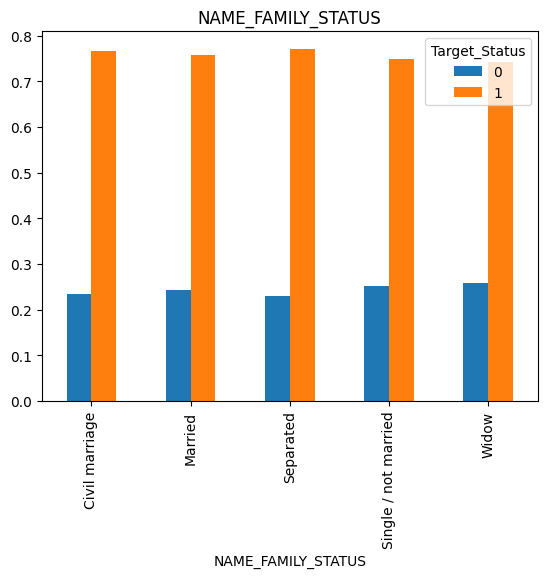

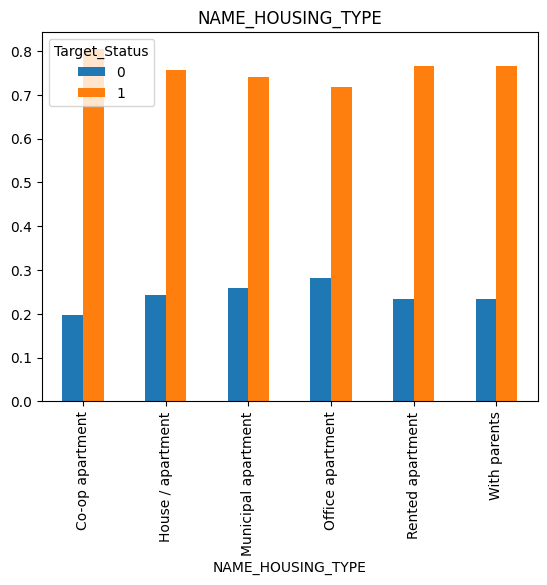

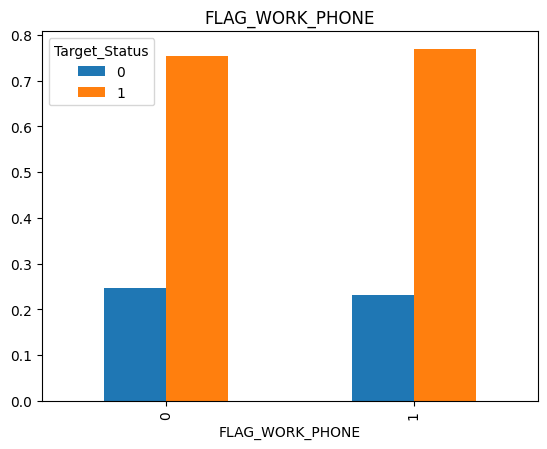

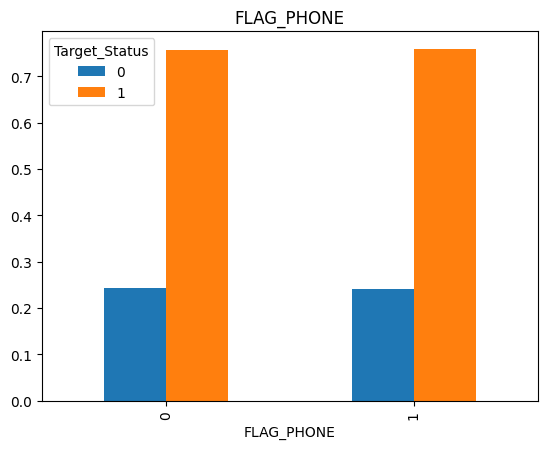

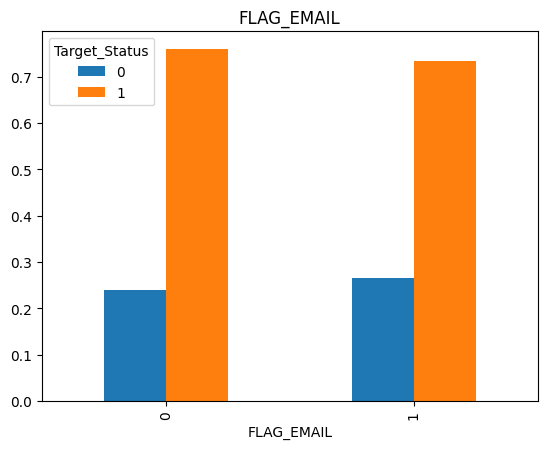

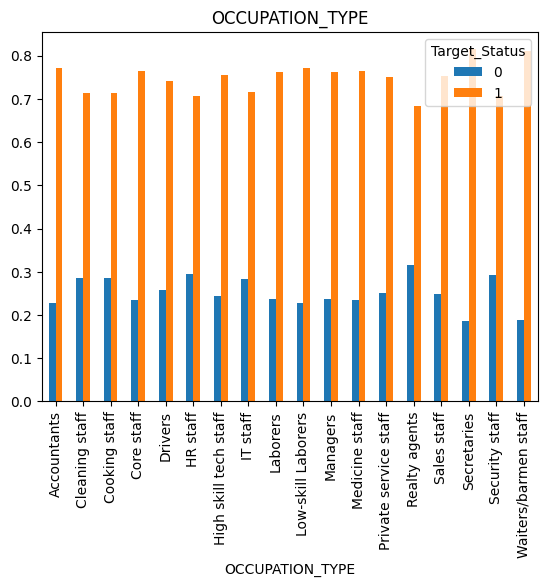

In [132]:
plt.figure(figsize=(30,30))
#plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.8, wspace=0.2)
for column_name in list_categorical_columns:
    pd.crosstab(df[column_name], df[target_column], normalize="index").plot.bar()
    plt.title(column_name)
plt.show()

In [133]:
list_meaningful_column_by_chi = []
for column_name in list_categorical_columns:
  statistic, pvalue, _, _ = chi2_contingency(pd.crosstab(df[target_column], df[column_name]))
  if pvalue <= 0.05:
    list_meaningful_column_by_chi.append(column_name)
  print(column_name, ", ", statistic, ", ", pvalue)
print("all categorical columns : ", len(list_categorical_columns))
print("selected columns by chi : ", len(list_meaningful_column_by_chi), list_meaningful_column_by_chi)

CODE_GENDER ,  9.14917437672138e-06 ,  0.9975865942019964
FLAG_OWN_CAR ,  0.5098662708631283 ,  0.4751967521310614
FLAG_OWN_REALTY ,  4.977225226185185 ,  0.025683144705680533
NAME_INCOME_TYPE ,  2.01113474585598 ,  0.7337107708524153
NAME_EDUCATION_TYPE ,  18.572087173370093 ,  0.0009536101652285508
NAME_FAMILY_STATUS ,  7.550663604106124 ,  0.10949588140271563
NAME_HOUSING_TYPE ,  6.989183690226566 ,  0.22144597438992644
FLAG_WORK_PHONE ,  8.161893932932294 ,  0.004277967441616775
FLAG_PHONE ,  0.141973825352162 ,  0.7063265945457923
FLAG_EMAIL ,  10.15955131332863 ,  0.0014355555483766811
OCCUPATION_TYPE ,  37.75898732078343 ,  0.00265220666581643
all categorical columns :  11
selected columns by chi :  5 ['FLAG_OWN_REALTY', 'NAME_EDUCATION_TYPE', 'FLAG_WORK_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE']


##### Insight
1. Only 5 out of 11 categorical data have a significant relationship with y (dependent variable).
2. Feature selection of categorical data with meaningful relationships and use it for later ML learning

#### 2) Numeric Data Analysis

In [134]:
df[list_numeric_columns].nunique().sort_index()


AMT_INCOME_TOTAL     265
CNT_CHILDREN           9
CNT_FAM_MEMBERS       10
DAYS_BIRTH          7183
DAYS_EMPLOYED       3640
MONTHS_BALANCE        61
dtype: int64

In [135]:
df[list_numeric_columns].describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,MONTHS_BALANCE
count,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.000000,36457.000000
mean,0.430315,1.866857e+05,-15975.173382,59262.935568,2.198453,-5.831802
std,0.742367,1.017892e+05,4200.549944,137651.334859,0.911686,11.326494
min,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.000000,-60.000000
25%,0.000000,1.215000e+05,-19438.000000,-3153.000000,2.000000,-6.000000
50%,0.000000,1.575000e+05,-15563.000000,-1552.000000,2.000000,0.000000
75%,1.000000,2.250000e+05,-12462.000000,-408.000000,3.000000,0.000000
max,19.000000,1.575000e+06,-7489.000000,365243.000000,20.000000,0.000000


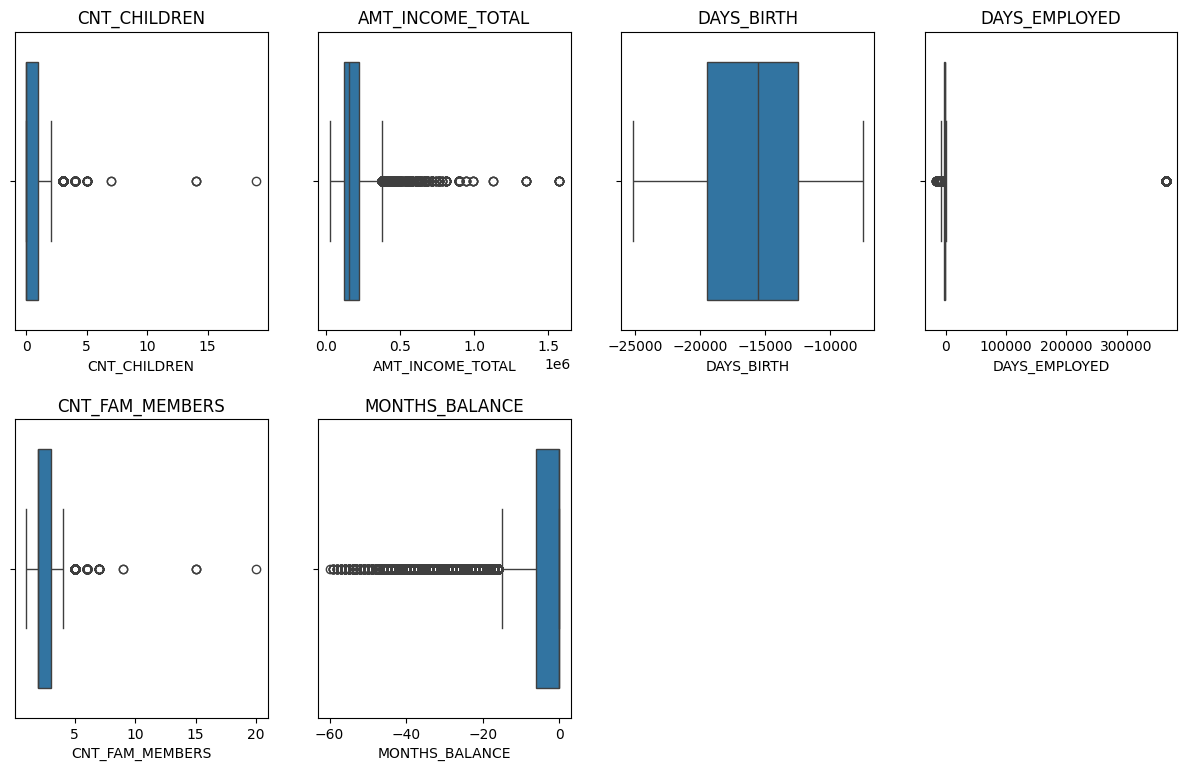

In [136]:
plt.figure(figsize=(15,7))
x = 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.3, wspace=0.2)
for column_name in list_numeric_columns:
    plt.subplot(2,4,x)
    x = x+1
    sns.boxplot(x=column_name, data=df)
    plt.title(column_name)
plt.show()

In [137]:
for column_name in list_numeric_columns:
  print(column_name, "skew : ", skew(df[column_name]), "kur : ", kurtosis(df[column_name]) )

CNT_CHILDREN skew :  2.5692764853112635 kur :  22.55917511845248
AMT_INCOME_TOTAL skew :  2.738897180151655 kur :  17.595506164509793
DAYS_BIRTH skew :  -0.18422206947290823 kur :  -1.045664746406706
DAYS_EMPLOYED skew :  1.7723702515885982 kur :  1.1430772697054437
CNT_FAM_MEMBERS skew :  1.298542476962789 kur :  8.187407769180325
MONTHS_BALANCE skew :  -2.1378871685624534 kur :  3.918957344284352


##### Correlation Analysis

<Axes: >

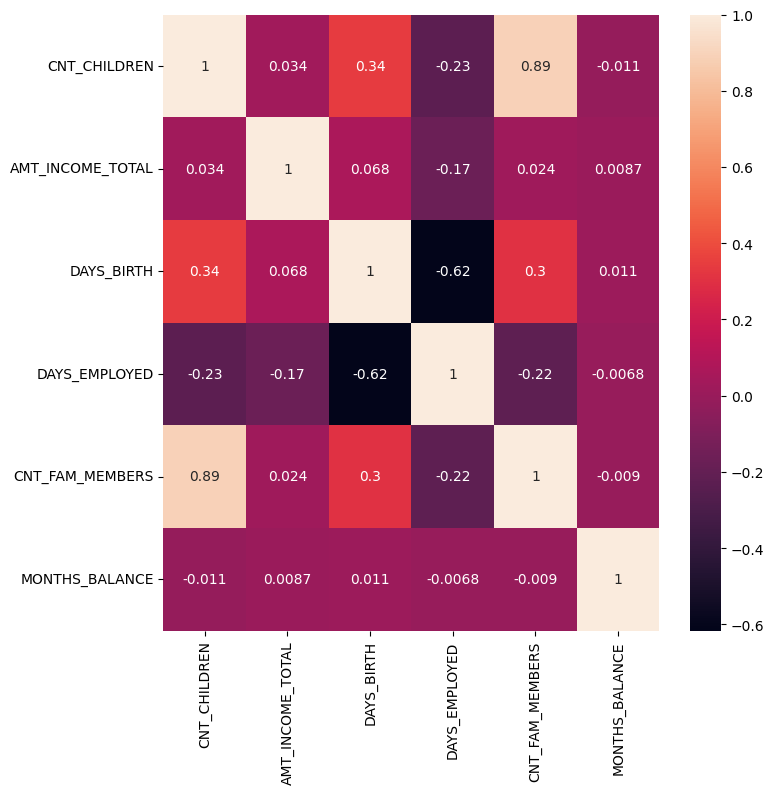

In [138]:
df_corr = df[list_numeric_columns].corr()

plt.figure(figsize=(8,8))

sns.heatmap(df_corr, annot=True)

In [139]:
index_corr_over_85 = np.where((abs(df_corr)> 0.85) & (df_corr !=1))
index_corr_over_85

(array([0, 4]), array([4, 0]))

In [140]:

statistic, pvalue = stats.pearsonr(df.loc[:,"CNT_FAM_MEMBERS"], df.loc[:,"CNT_CHILDREN"])
print(statistic)
print(pvalue)

0.8891141560148559
0.0


##### VIF Analysis


In [141]:
# caculate_vif function
def caculate_vif(df_target):
  vif = pd.DataFrame()
  vif["VIF_Factor"] = [variance_inflation_factor(df_target.values, i) for i in range(df_target.shape[1])]
  vif["Feature"] = df_target.columns
  return vif

df_vif = df[list_numeric_columns].copy()

In [142]:
# VIF Factor
caculate_vif(df[list_numeric_columns])



,VIF_Factor,Feature
0,5.501891,CNT_CHILDREN
1,4.177863,AMT_INCOME_TOTAL
2,13.927450,DAYS_BIRTH
3,1.814530,DAYS_EMPLOYED
4,20.422667,CNT_FAM_MEMBERS
5,1.259641,MONTHS_BALANCE


In [143]:
# remove CNT_FAM_MEMBERS 
caculate_vif(df[list_numeric_columns].drop("CNT_FAM_MEMBERS", axis=1))


,VIF_Factor,Feature
0,1.317477,CNT_CHILDREN
1,4.030542,AMT_INCOME_TOTAL
2,5.406126,DAYS_BIRTH
3,1.665757,DAYS_EMPLOYED
4,1.256456,MONTHS_BALANCE


In [144]:
list_numeric_feature_by_vif = list_numeric_columns.copy()
list_numeric_feature_by_vif.remove("CNT_FAM_MEMBERS")

In [145]:
list_numeric_feature_by_vif

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'MONTHS_BALANCE']

##### Check distribution of target column and numeric column relationship

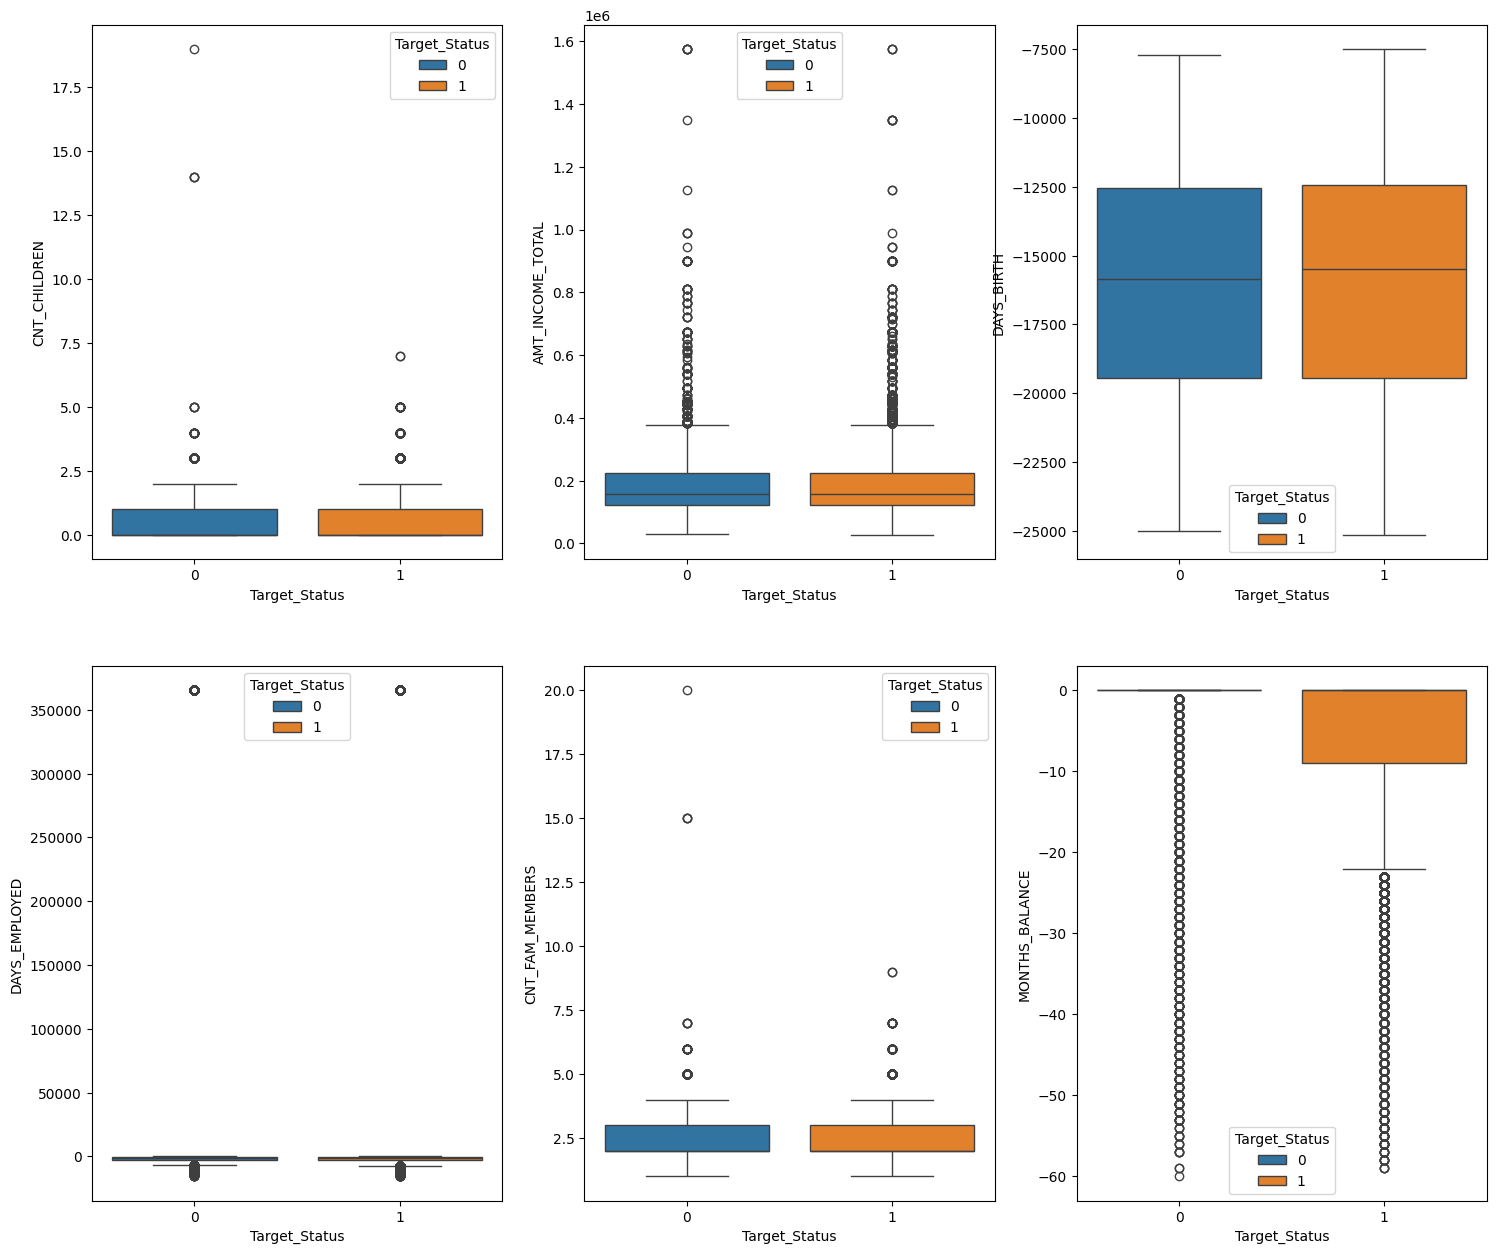

In [146]:
plt.figure(figsize=(18,12))
x = 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.2, wspace=0.2)
for column_name in list_numeric_columns:
    plt.subplot(2,3,x)
    x = x + 1
    sns.boxplot(data=df,x=target_column,y=column_name, hue=target_column)
plt.show()

# month_balance 차이가 보임

#### ANOVA

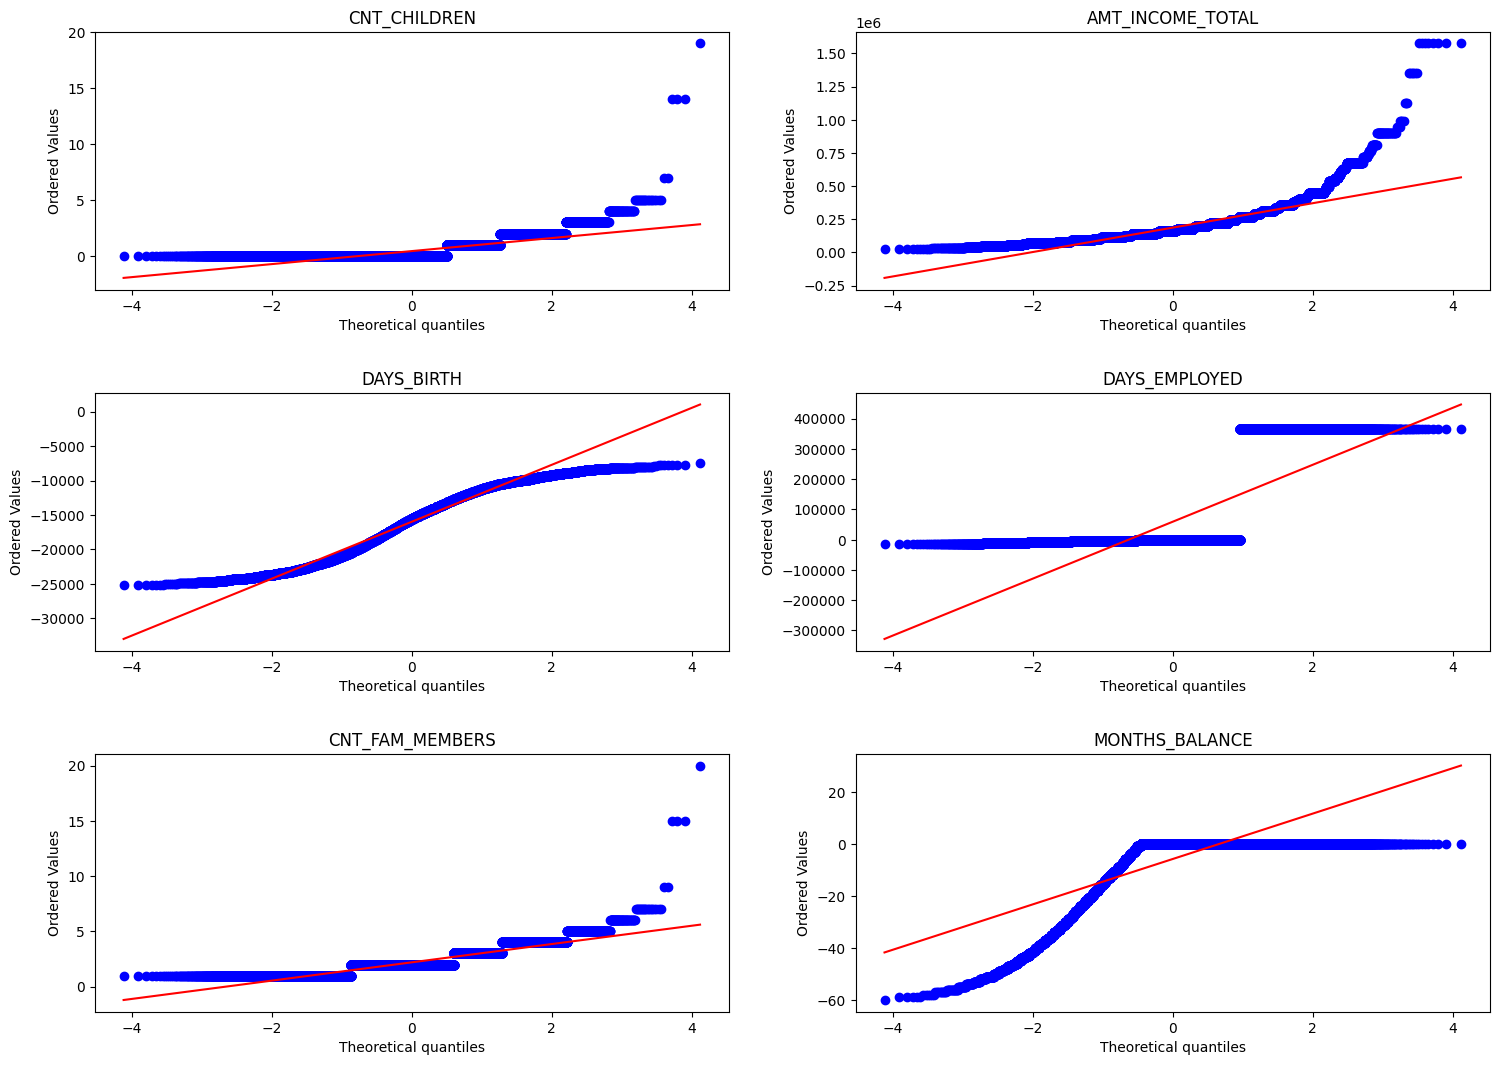

In [147]:
plt.figure(figsize=(18,10))
x = 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.4, wspace=0.2)
for column_name in list_numeric_columns:
    plt.subplot(3,2,x)
    x = x+1
    stats.probplot(df[column_name], dist=stats.norm, plot=plt)
    plt.title(column_name)
plt.show()

In [148]:
list_column_normality = []
for column_name in list_numeric_columns:
  statistic, pvalue = stats.shapiro(df[column_name])
  if pvalue >= 0.05:
    list_column_normality.append(column_name)
  print(column_name, ", statistic : ", statistic, ", pvalue : ", pvalue)

print("Number of columns that satisfy normality : ",len(list_column_normality))

CNT_CHILDREN , statistic :  0.6152937705806769 , pvalue :  2.2142495006866363e-125
AMT_INCOME_TOTAL , statistic :  0.8168496452628089 , pvalue :  4.158438860652268e-105
DAYS_BIRTH , statistic :  0.966297111706394 , pvalue :  1.1692021521154388e-65
DAYS_EMPLOYED , statistic :  0.46610934407707916 , pvalue :  6.535805462011858e-135
CNT_FAM_MEMBERS , statistic :  0.8236549801777469 , pvalue :  4.0234495421358244e-104
MONTHS_BALANCE , statistic :  0.591912578199909 , pvalue :  4.524659155950623e-127
Number of columns that satisfy normality :  0


/var/folders/ry/6rbzws495sbbjxhmj2lm1fzr0000gn/T/ipykernel_23433/4275839059.py:3: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 36457.
  statistic, pvalue = stats.shapiro(df[column_name])


##### Kruskall-Wallis test

In [149]:
list_target_unique = df[target_column].unique()
list_meaningful_column_by_kruskall = []

for column_name in list_numeric_columns:
  list_by_quality_value = []
  for quality_value in list_target_unique:
      df_tmp = df[df[target_column] == quality_value][column_name].dropna()
      list_by_quality_value.append(np.array(df_tmp))

  statistic, pvalue = kruskal(*list_by_quality_value)
  if(pvalue <= 0.05):
    list_meaningful_column_by_kruskall.append(column_name)
  
  print(column_name, ", ",statistic,", ", pvalue)
print("all numerical columns : ", len(list_numeric_columns))
print("selected columns by kruskal : ", len(list_meaningful_column_by_kruskall), list_meaningful_column_by_kruskall)

CNT_CHILDREN ,  0.9337989725891732 ,  0.33387770621591706
AMT_INCOME_TOTAL ,  0.5387857888480218 ,  0.46293637094856877
DAYS_BIRTH ,  2.1336943086384164 ,  0.1440931072120902
DAYS_EMPLOYED ,  25.523534603497747 ,  4.370195260220316e-07
CNT_FAM_MEMBERS ,  0.9386094371351926 ,  0.33263571559306976
MONTHS_BALANCE ,  945.4711171201508 ,  1.280009852962771e-207
all numerical columns :  6
selected columns by kruskal :  2 ['DAYS_EMPLOYED', 'MONTHS_BALANCE']


## 3. Data Processing 2

### 3-1 Feature Selection




In [150]:
list_selected_numerical = list_meaningful_column_by_kruskall.copy()

In [151]:
df_fs = df[list_meaningful_column_by_chi + list_selected_numerical + [target_column]]
df_fs.head(2)

,FLAG_OWN_REALTY,NAME_EDUCATION_TYPE,FLAG_WORK_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,DAYS_EMPLOYED,MONTHS_BALANCE,Target_Status
0,Y,Higher education,1,0,NaN,-4542,0,1
1,Y,Higher education,1,0,NaN,-4542,0,1


### 3-2 Missing Values

In [152]:
df_fs.isna().sum()

FLAG_OWN_REALTY            0
NAME_EDUCATION_TYPE        0
FLAG_WORK_PHONE            0
FLAG_EMAIL                 0
OCCUPATION_TYPE        11323
DAYS_EMPLOYED              0
MONTHS_BALANCE             0
Target_Status              0
dtype: int64

In [153]:
df["OCCUPATION_TYPE"]

0                   NaN
1                   NaN
2        Security staff
3           Sales staff
4           Sales staff
              ...      
36452          Managers
36453    Medicine staff
36454    Medicine staff
36455       Sales staff
36456          Laborers
Name: OCCUPATION_TYPE, Length: 36457, dtype: object

### 3-3 Feature Transformation

In [155]:

Y = df_fs[target_column]
X = df_fs.drop([target_column], axis=1)

In [156]:
Y

0        1
1        1
2        1
3        0
4        1
        ..
36452    0
36453    1
36454    1
36455    0
36456    0
Name: Target_Status, Length: 36457, dtype: object

##### Label Encoding

In [157]:
le = LabelEncoder()
le.fit(Y)
Y_encoded = le.transform(Y)

In [158]:
Y_encoded

array([1, 1, 1, ..., 1, 0, 0])

In [159]:
type(Y_encoded[0])

numpy.int64

##### Feature Scaling



In [160]:
list_categorical_columns = list(df_fs.select_dtypes(include=['object']).columns)
list_numeric_columns = list(df_fs.select_dtypes(include=['float64','int64']).columns)
print(len(list_categorical_columns))
print(len(list_numeric_columns))

6
2


In [161]:
# minmaxscaling
scaler_minmax = MinMaxScaler()
X.loc[:, list_selected_numerical] = scaler_minmax.fit_transform(X[list_selected_numerical])
X.head(1)


,FLAG_OWN_REALTY,NAME_EDUCATION_TYPE,FLAG_WORK_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,DAYS_EMPLOYED,MONTHS_BALANCE
0,Y,Higher education,1,0,NaN,0.029324,1.0


##### One-hot Encoding for categorical column data

In [162]:
X_base = pd.get_dummies(X)
X_base.head(1)

,DAYS_EMPLOYED,MONTHS_BALANCE,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,FLAG_WORK_PHONE_0,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,0.029324,1.0,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### 3-4 Sampling




In [163]:
X_train, X_validation, y_train, y_validation = train_test_split(X_base, Y_encoded, test_size=0.2, stratify=Y_encoded)

SMOTE

In [164]:
# smote oversampling
sm = SMOTE(random_state=random_state)
X_sm_sampling, y_sm_sampling = sm.fit_resample(X_train, y_train)



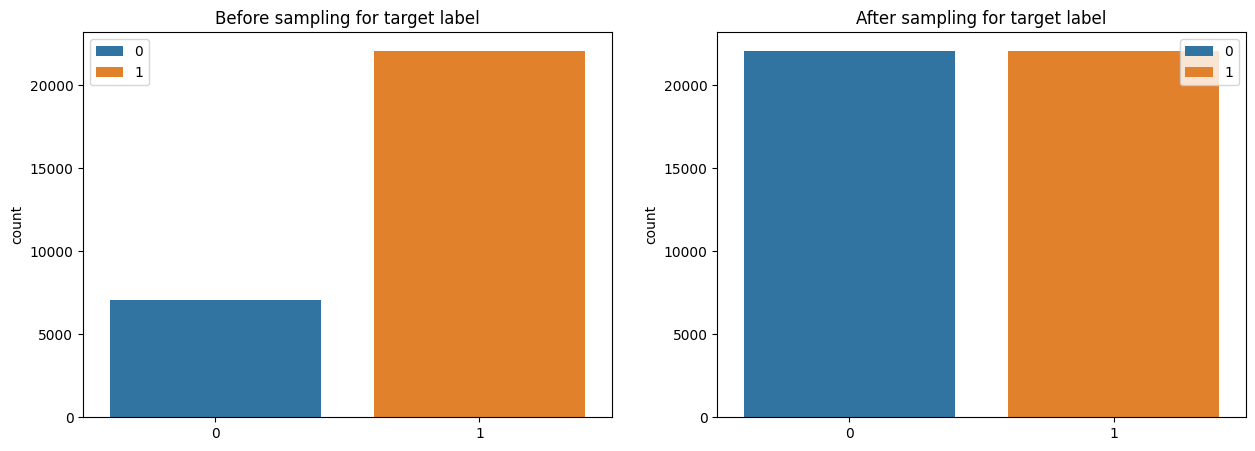

In [177]:
fig = plt.figure(figsize=(15,5))


plt.subplot(121)
sns.countplot(data=pd.DataFrame(y_train), x=y_train, hue=y_train)
plt.title("Before sampling for target label")


plt.subplot(122)
sns.countplot(data=pd.DataFrame(y_sm_sampling), x=y_sm_sampling, hue=y_sm_sampling)
plt.title("After sampling for target label")

plt.show()


SMOTEENN

In [166]:
combined_sm = SMOTEENN(random_state=random_state)
X_csm_sampling, y_csm_sampling = combined_sm.fit_resample(X_train, y_train)

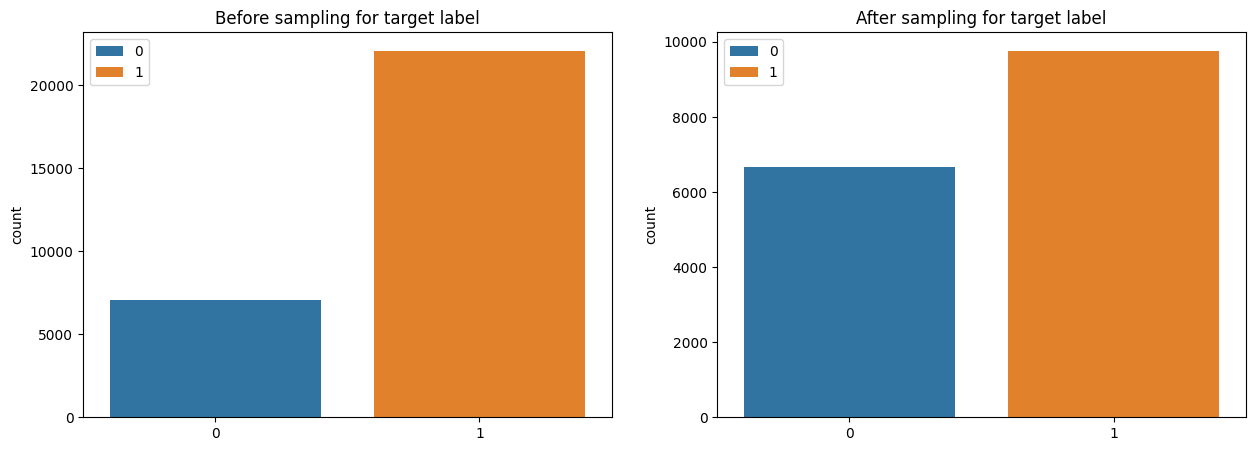

In [178]:
fig = plt.figure(figsize=(15,5))


plt.subplot(121)
sns.countplot(data=pd.DataFrame(y_train), x=y_train, hue=y_train)
plt.title("Before sampling for target label")


plt.subplot(122)
sns.countplot(data=pd.DataFrame(y_csm_sampling), x=y_csm_sampling, hue=y_csm_sampling)
plt.title("After sampling for target label")

plt.show()

### 3-3 Summary
1.   Feature Selection by Chi-test, correlation and kruskal-test
2.   Feature Transformation
3.   Sampling (oversampling, combiedsampling)

##### Feature 
1.   X_base, Y_encoded (No sampling, imbalanced data)
2.   X_sm_sampling, Y_sm_sampling (smote oversampling)
3.   X_csm_sampling, y_csm_sampling (smoteenn combinedsampling)

## 4. Model Analysis
1.   base model without sampling
2.   model optimization with base feature
3.   model optimization with smote oversampling
4.   model optimization with smoteenn combined sampling

In [179]:
list_model_type = []
list_model_best_params = []
list_model_f1_score = []
cv = 3
n_iter_randomsearch = 40

### 4-1. Base model without sampling

In [180]:
skf = StratifiedKFold(n_splits=3)
skf.get_n_splits(X_train, y_train)

3

In [181]:
# mlflow settings
import mlflow 
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.create_experiment("credit_approval_ml_fc")


'620511766407335719'

In [182]:
# mlflow set experiment 
mlflow.set_experiment("credit_approval_ml_fc")


<Experiment: artifact_location='mlflow-artifacts:/620511766407335719', creation_time=1711770472836, experiment_id='620511766407335719', last_update_time=1711770472836, lifecycle_stage='active', name='credit_approval_ml_fc', tags={}>

In [185]:
# mlflow set autologging 
mlflow.sklearn.autolog()



In [186]:
list_fold_result = []
for i, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
  X_train_cv, X_test_cv = X_train.iloc[train_index, :], X_train.iloc[test_index, :]
  y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]
  rf_clf = MLPClassifier(hidden_layer_sizes=10)
  rf_clf.fit(X_train_cv, y_train_cv)
  y_prd_test = rf_clf.predict(X_test_cv)
  y_prd_proba_test = rf_clf.predict_proba(X_test_cv)[:,-1]
  prf_score_test = precision_recall_fscore_support(y_test_cv, y_prd_test, average="macro")
  score_test = roc_auc_score(y_test_cv, y_prd_proba_test)
  print(i, " precision, recall, f1score : ", prf_score_test)
  print(i, " roc_auc_score : ", score_test)

  y_prd_validation = rf_clf.predict(X_validation)
  y_prd_proba_validation = rf_clf.predict_proba(X_validation)[:,-1]
  prf_score_validation = precision_recall_fscore_support(y_validation, y_prd_validation, average="macro")
  score_validation = roc_auc_score(y_validation, y_prd_proba_validation)
  print("validation : precision, recall, f1score : ",prf_score_validation)
  print("validation : roc_auc_score : ",score_validation)
  list_fold_result.append(prf_score_validation[2])
  mlflow.log_param("feature_type", "base feature")

f1score_final = np.mean(list_fold_result)
print("average roc auc score : ",f1score_final)
list_model_type.append("Base model without sampling")
list_model_best_params.append({})
list_model_f1_score.append(f1score_final)

2024/03/29 20:52:29 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '574847cc775a49e38a3be301fad78d3c', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/03/29 20:52:29 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/dylank/.local/lib/python3.10/site-packages/mlflow/data/digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."
2024/03/29 20:52:34 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/homebrew/Caskroom/miniforge3/envs/dylan/lib/python3.10/site-packages/_distutils_hack/__init__.py:26: UserWarning: Setuptools is replacing distutils."
2024/03/29 20:52:34 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/dylank/.local/lib/python3.10/site-packages/mlflow/data/digest_utils.py:26: FutureWarning: DataFrame.app

0  precision, recall, f1score :  (0.6142740249113556, 0.5010860745865113, 0.43430129863207595, None)
0  roc_auc_score :  0.5912881016837943


2024/03/29 20:52:34 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/dylank/.local/lib/python3.10/site-packages/mlflow/data/digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."


validation : precision, recall, f1score :  (0.6707188644688644, 0.501527067408036, 0.4349697601521996, None)
validation : roc_auc_score :  0.5764018015996015


2024/03/29 20:52:38 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/dylank/.local/lib/python3.10/site-packages/mlflow/data/digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."
2024/03/29 20:52:38 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/dylank/.local/lib/python3.10/site-packages/mlflow/data/digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."
2024/03/29 20:52:38 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/dylank/.local/lib/python3.10/site-packages/mlflow/data/digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."
2024/03/29 20:52:38 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/dylank/.local/lib/python3.10/site-packages/mlflow/data/digest_utils.py:26: FutureWarni

1  precision, recall, f1score :  (0.6290189612530915, 0.5012982086552428, 0.4347461788221799, None)
1  roc_auc_score :  0.5987011000728428


2024/03/29 20:52:38 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/dylank/.local/lib/python3.10/site-packages/mlflow/data/digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."


validation : precision, recall, f1score :  (0.6097361218256946, 0.5010632337377663, 0.434283523263581, None)
validation : roc_auc_score :  0.5691249373363783


2024/03/29 20:52:42 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/dylank/.local/lib/python3.10/site-packages/mlflow/data/digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."
2024/03/29 20:52:42 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/dylank/.local/lib/python3.10/site-packages/mlflow/data/digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."
2024/03/29 20:52:42 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/dylank/.local/lib/python3.10/site-packages/mlflow/data/digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."
2024/03/29 20:52:42 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/dylank/.local/lib/python3.10/site-packages/mlflow/data/digest_utils.py:26: FutureWarni

2  precision, recall, f1score :  (0.5351268675940237, 0.5003143452547669, 0.4329222198841987, None)
2  roc_auc_score :  0.5933687818192087
validation : precision, recall, f1score :  (0.601118281538438, 0.5006786511184432, 0.43318719156777963, None)
validation : roc_auc_score :  0.5712720879027264
average roc auc score :  0.4341468249945201


<AxesSubplot: >

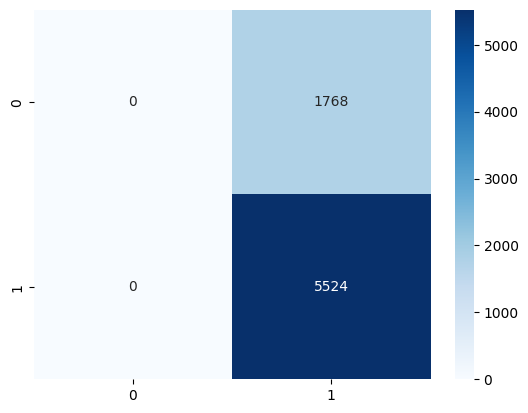

In [174]:
cm = pd.DataFrame(confusion_matrix(y_validation,y_prd_validation))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d')

### 4-2. model optimization with base feature

In [190]:
def plot_roc_auc(y_true, y_prd_proba):
  fpr, tpr, _ = roc_curve(y_true,  y_prd_proba)
  auc = roc_auc_score(y_true, y_prd_proba)
  plt.figure(figsize=(7,7))
  plt.plot(fpr,tpr,label="auc="+str(auc))
  plt.legend(loc=4)
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.show()

In [191]:
mlflow.end_run()

In [192]:
def model_learning_with_randomsearch(model, hyper_parameter, X, Y, feature_type="base_feature",metric="roc_auc"):
  with mlflow.start_run():
    random_cv_opt = RandomizedSearchCV(estimator=model, param_distributions=hyper_parameter, n_iter=n_iter_randomsearch, cv = cv, random_state=random_state, scoring=metric, verbose=1)
    random_cv_opt.fit(X, Y)
    y_prd = random_cv_opt.predict(X_validation)
    mlflow.log_param("feature_type", feature_type)
    prf_score = precision_recall_fscore_support(y_validation, y_prd, average="macro")
    y_prd_proba = random_cv_opt.predict_proba(X_validation)[:,-1]
    score = roc_auc_score(y_validation, y_prd_proba)
    print('validation -> best model hyper-parameter : ', random_cv_opt.best_params_)
    print("validation -> precision, recall, f1score : ", prf_score)
    print("validation -> roc_auc_score : ", score)

    cm = pd.DataFrame(confusion_matrix(y_validation,y_prd))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d')

  return random_cv_opt.best_params_, prf_score, prf_score[2]

2024/03/29 20:57:45 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/dylank/.local/lib/python3.10/site-packages/mlflow/data/digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."


/Users/dylank/.local/lib/python3.10/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 32 is smaller than n_iter=40. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 32 candidates, totalling 96 fits


2024/03/29 20:58:30 INFO mlflow.sklearn.utils: Logging the 5 best runs, 27 runs will be omitted.
2024/03/29 20:58:30 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/dylank/.local/lib/python3.10/site-packages/mlflow/data/digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."
2024/03/29 20:58:30 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/dylank/.local/lib/python3.10/site-packages/mlflow/data/digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."


validation -> best model hyper-parameter :  {'warm_start': False, 'solver': 'adam', 'power_t': 0.5, 'max_iter': 10000, 'learning_rate_init': 0.01, 'learning_rate': 'constant', 'hidden_layer_sizes': 25, 'early_stopping': True, 'alpha': 0.0001, 'activation': 'relu'}
validation -> precision, recall, f1score :  (0.742773844751595, 0.5019909010783058, 0.43565661161641334, None)
validation -> roc_auc_score :  0.5855385057716063


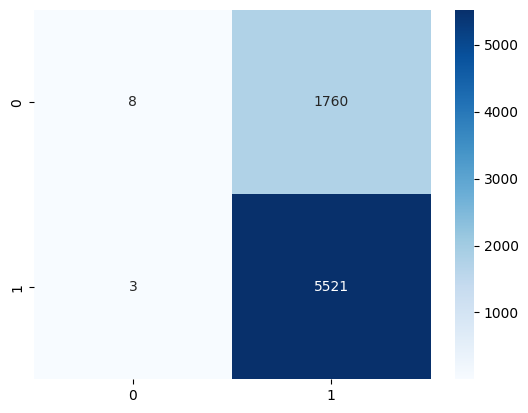

In [193]:
hyper_params_mlp = {
    'hidden_layer_sizes': [10, 15, 20, 25],
    'activation': ['tanh', 'relu'],
    'solver': ["sgd", "adam"],
    'learning_rate': ['constant'],
    'learning_rate_init': [0.001, 0.01],
    'power_t': [0.5],
    'alpha': [0.0001],
    'max_iter': [10000],
    'early_stopping': [True],
    'warm_start': [False]
              }

params, prf_score, score = model_learning_with_randomsearch(MLPClassifier(), hyper_params_mlp, X_base, Y_encoded, feature_type="base_feature")
list_model_type.append("model optimization with base feature")
list_model_best_params.append(params)
list_model_f1_score.append(score)

### 4-3. model optimization with smote oversampling

2024/03/29 20:59:26 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/dylank/.local/lib/python3.10/site-packages/mlflow/data/digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."
/Users/dylank/.local/lib/python3.10/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 32 is smaller than n_iter=40. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 32 candidates, totalling 96 fits


2024/03/29 21:01:59 INFO mlflow.sklearn.utils: Logging the 5 best runs, 27 runs will be omitted.
2024/03/29 21:01:59 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/dylank/.local/lib/python3.10/site-packages/mlflow/data/digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."
2024/03/29 21:01:59 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/dylank/.local/lib/python3.10/site-packages/mlflow/data/digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."


validation -> best model hyper-parameter :  {'warm_start': False, 'solver': 'adam', 'power_t': 0.5, 'max_iter': 10000, 'learning_rate_init': 0.01, 'learning_rate': 'constant', 'hidden_layer_sizes': 25, 'early_stopping': True, 'alpha': 0.0001, 'activation': 'relu'}
validation -> precision, recall, f1score :  (0.55205431317124, 0.5669833159131196, 0.47870902761112366, None)
validation -> roc_auc_score :  0.5795486007581889


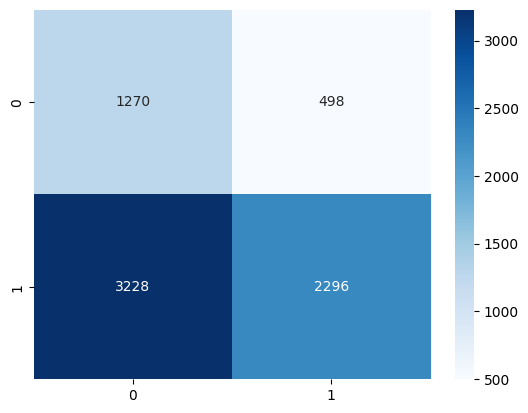

In [194]:
params, prf_score, score = model_learning_with_randomsearch(MLPClassifier(), hyper_params_mlp, X_sm_sampling, y_sm_sampling, feature_type="smote oversampling")
list_model_type.append("model optimization with smote oversampling")
list_model_best_params.append(params)
list_model_f1_score.append(score)

### 4-4. model optimization with smoteenn combined sampling

2024/03/29 21:03:55 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/dylank/.local/lib/python3.10/site-packages/mlflow/data/digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."


/Users/dylank/.local/lib/python3.10/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 32 is smaller than n_iter=40. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 32 candidates, totalling 96 fits


2024/03/29 21:04:51 INFO mlflow.sklearn.utils: Logging the 5 best runs, 27 runs will be omitted.
2024/03/29 21:04:51 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/dylank/.local/lib/python3.10/site-packages/mlflow/data/digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."
2024/03/29 21:04:52 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/dylank/.local/lib/python3.10/site-packages/mlflow/data/digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."


validation -> best model hyper-parameter :  {'warm_start': False, 'solver': 'adam', 'power_t': 0.5, 'max_iter': 10000, 'learning_rate_init': 0.01, 'learning_rate': 'constant', 'hidden_layer_sizes': 25, 'early_stopping': True, 'alpha': 0.0001, 'activation': 'relu'}
validation -> precision, recall, f1score :  (0.5295438559418473, 0.5364182129154229, 0.5256968500355096, None)
validation -> roc_auc_score :  0.5511249144006736


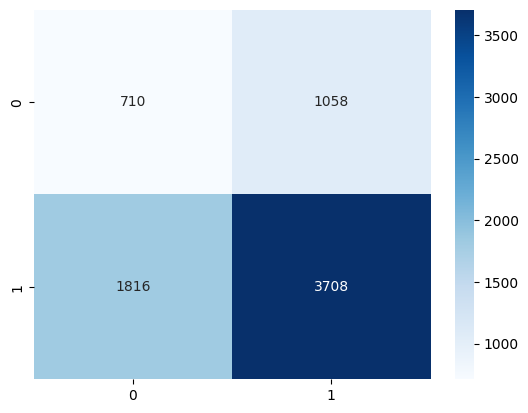

In [195]:
params, prf_score, score = model_learning_with_randomsearch(MLPClassifier(), hyper_params_mlp, X_csm_sampling, y_csm_sampling, feature_type="smoteenn combined sampling")
list_model_type.append("model optimization with smoteenn combined sampling")
list_model_best_params.append(params)
list_model_f1_score.append(score)

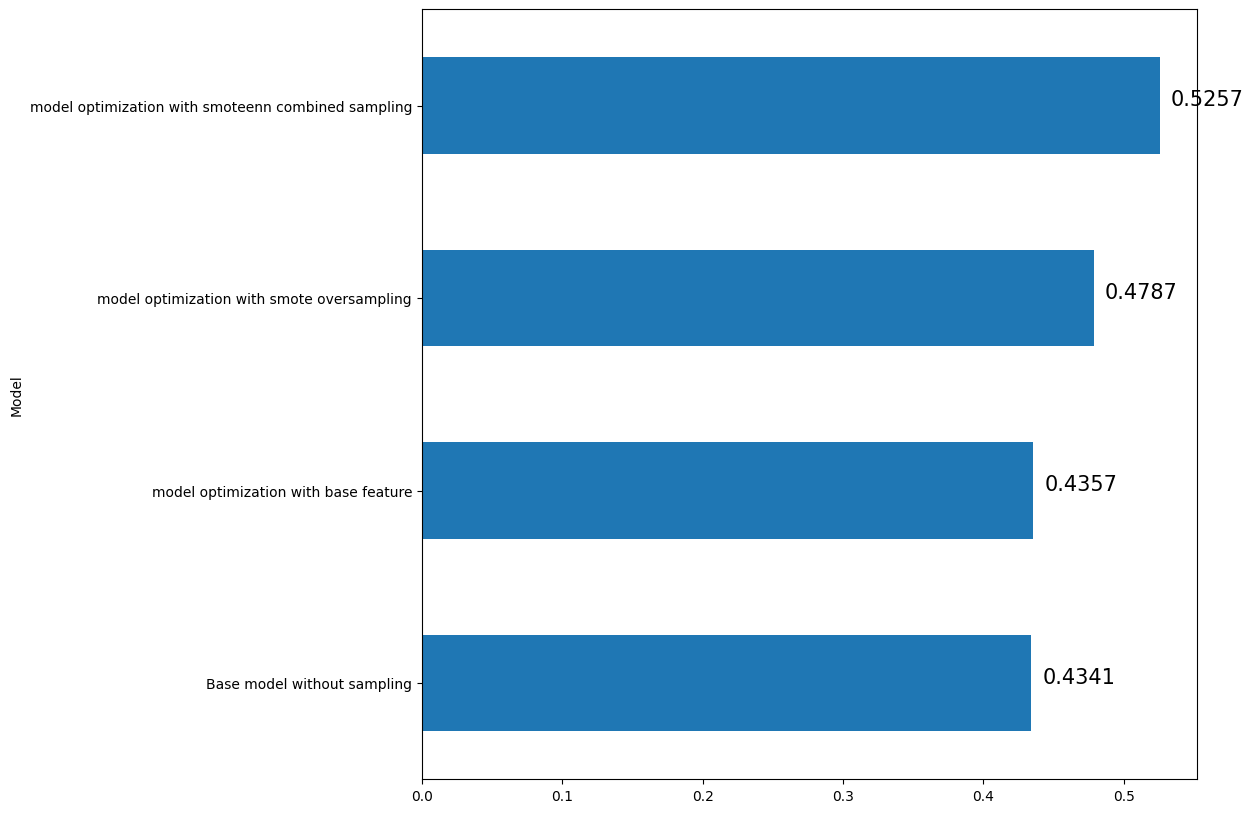

In [196]:
df_metric = pd.DataFrame({'Model':list_model_type, 'f1score_macro':list_model_f1_score})
ax = df_metric.plot.barh(x='Model', y='f1score_macro', rot=0, figsize=(10,10), legend=False)
for bar in ax.patches:
    ax.annotate(format(bar.get_width(), '.4f'),
                   (bar.get_width(), bar.get_y() + bar.get_height() / 2),
                   size=15, xytext=(8, 0),
                   textcoords='offset points')

### 4.6 Model Serving

In [197]:
# Load production models 

model_uri = "models:/creditapprovalmodel@Staging"
loaded_model = mlflow.sklearn.load_model(model_uri)


In [198]:
loaded_model

RandomizedSearchCV(cv=3, estimator=MLPClassifier(), n_iter=40,
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'alpha': [0.0001],
                                        'early_stopping': [True],
                                        'hidden_layer_sizes': [10, 15, 20, 25],
                                        'learning_rate': ['constant'],
                                        'learning_rate_init': [0.001, 0.01],
                                        'max_iter': [10000], 'power_t': [0.5],
                                        'solver': ['sgd', 'adam'],
                                        'warm_start': [False]},
                   random_state=1234, scoring='roc_auc', verbose=1)

In [199]:
y_prd_production = loaded_model.predict(X_validation)

In [200]:
y_prd_production
prf_score_production = precision_recall_fscore_support(y_validation, y_prd_production, average="macro")
score_production = roc_auc_score(y_validation, y_prd_production)

print(prf_score_production)
print(score_production)

(0.5295438559418473, 0.5364182129154229, 0.5256968500355096, None)
0.5364182129154229


In [ ]:
# mlflow models serve -m ./mlartifacts/162836187436232346/2a288e9bcc7b4505924949cfc101051f/artifacts/best_estimator -p 5001 --no-conda

In [190]:
import pandas as pd
import requests

# Define local host and endpoint url
host = "127.0.0.1"
url = f"http://{host}:5001/invocations"

# Create dictionary with pandas DataFrame in the split orientation
json_data = {"dataframe_split": X_validation[20:50].to_dict(orient="split")}

# Score model
response = requests.post(url, json=json_data)
print(f"\nPyfunc 'predict_interval':\n${response.json()}")



Pyfunc 'predict_interval':
${'predictions': [1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1]}


### 4.7 Model Analysis

##### Shapley Value




In [201]:
mlp_final = MLPClassifier(**{'warm_start': False, 'solver': 'adam', 'power_t': 0.5, 'max_iter': 10000, 'learning_rate_init': 0.01, 'learning_rate': 'constant', 'hidden_layer_sizes': 25, 'early_stopping': True, 'alpha': 0.0001, 'activation': 'relu'})
mlp_final.fit(X_csm_sampling, y_csm_sampling)

2024/03/29 21:21:57 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'b03ab28fe5f04c9e98b8dcc2b5cb4c95', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


2024/03/29 21:21:57 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/dylank/.local/lib/python3.10/site-packages/mlflow/data/digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."


MLPClassifier(early_stopping=True, hidden_layer_sizes=25,
              learning_rate_init=0.01, max_iter=10000)

In [ ]:
explainer = shap.Explainer(lambda x : mlp_final.predict_log_proba(x)[:,1], X_validation)
shap_values = explainer(X_validation)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


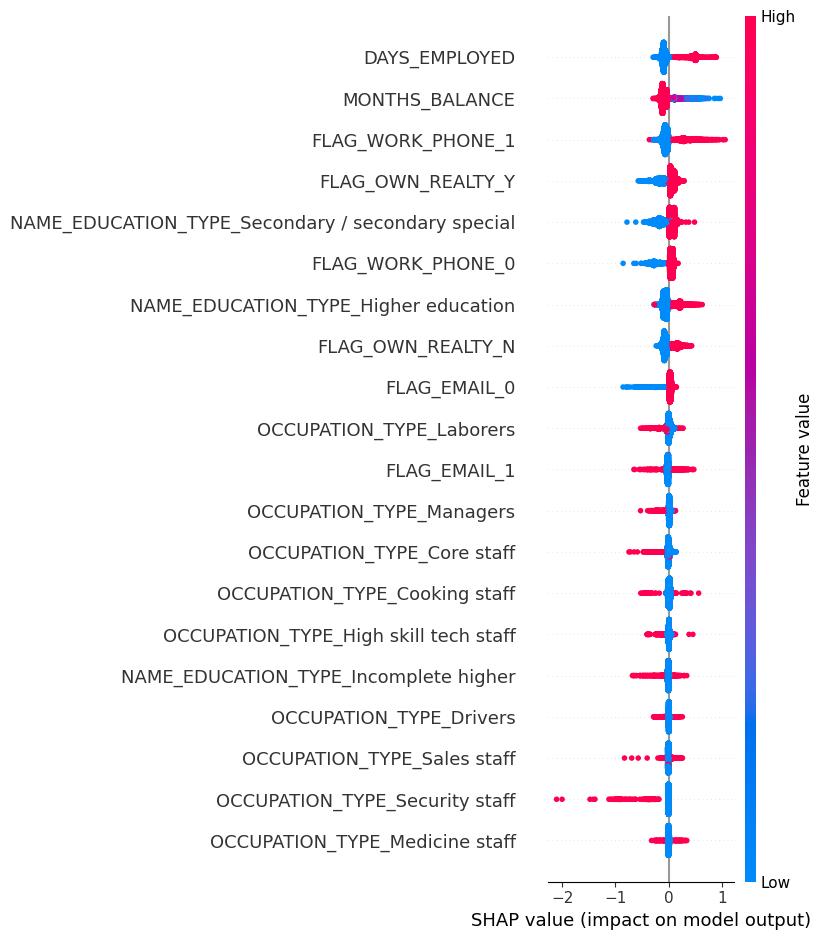

In [99]:
shap.summary_plot(shap_values, X_validation)